# AirBnb Price Prediction (ejam) ----- Prince Sharma





#  Task

### Task Description
1. Download a sample of the Seattle AirBnb listings dataset linked here (original data can be found here).
2. The goal of the assignment is to predict the prices of AirBnb listings from the test set, using a model carefully
selected by you, trained, tested, and explained.
3. Conduct some exploratory data analysis and understand the relationships between potential predictors. Document
your EDA in a notebook.
4. Note that this is not a particularly large dataset. You will be partially scored based on your ability to perform ETL on
the dataset. Describe what you have done for ETL in 3-4 sentences.
5. Try out a few different models (use your judgement after doing the EDA), and note down why you have tried each
one (2-3 sentences describing the “why” is enough).
6. Pick your final model, and explain why this model is better than the others. Train it, test it, and list out your
analyses (4-5 sentences, or more if required). Finally, run your predictions on the real test set provided above.

#  Exploratory Data Analysis
### In this part we wiil perform data analysis to check
#### 1.Missing Values
#### 2.All The Numerical Variables
#### 3.Distribution of the Numerical Variables
#### 4.Categorical Variables
#### 5.Cardinality of Categorical Variables
#### 6.Outliers
#### 7.Relationship between independent and dependent feature(price)

## Load Required Libraries and Reading the Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('C:/price_train.csv')
test = pd.read_csv('C:/price_test.csv')

##  Data Information

In total, there are 25 columns/variables in the train dataset, including the response variable (Price).


In [3]:
print("Rows and Columns of Train Dataset:" + str(train.shape))
print("Rows and Columns of Test Dataset:" + str(test.shape))

Rows and Columns of Train Dataset:(3466, 25)
Rows and Columns of Test Dataset:(1734, 24)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

#### Above information shows that the price in string format in order to predict price for test data first we have to convert from string to either float or int. Same thing goes with cleaning price also and host_response_rate. We also have three boolean data features so I have converted its data type from boolean to int for east process.

In [5]:
test_id = test['id']

In [6]:
train['price']=train.price.str.replace('[^\d.]', '').astype(float)

In [7]:
print(train.price.isnull().sum())

0


In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]

Megre Train and Test data.

In [9]:
data = pd.concat((train, test), sort=True).reset_index(drop=True)
data['Dataset'] = np.repeat(['Train', 'Test'], [ntrain, ntest], axis=0)
data.drop('id', axis=1,inplace=True)

In [10]:
data.head()

,X1,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,guests_included,...,instant_bookable,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_group_cleansed,price,property_type,room_type,Dataset
0,5460,5,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",2.0,Real Bed,2,2,strict,$129.00,4,...,True,47.612163,-122.338239,1125,2,Downtown,279.0,Apartment,Entire home/apt,Train
1,4143,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1.0,Real Bed,0,1,moderate,$50.00,1,...,True,47.640827,-122.355248,30,2,Queen Anne,99.0,House,Entire home/apt,Train
2,5802,4,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",1.0,Real Bed,1,2,moderate,$25.00,2,...,False,47.549007,-122.273951,28,2,Rainier Valley,75.0,Guest suite,Entire home/apt,Train
3,776,2,"{Internet,Wifi,Kitchen,""Pets live on this prop...",1.0,Real Bed,1,1,flexible,$0.00,1,...,False,47.601922,-122.307979,30,2,Central Area,70.0,House,Private room,Train
4,6064,8,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",2.5,Real Bed,3,3,flexible,$99.00,6,...,False,47.552311,-122.293409,12,2,Beacon Hill,242.0,House,Entire home/apt,Train


#### Boolean datatypes to int. and cleaning.

In [11]:
for i in data.columns:
    if len(data[i].value_counts()) == 2:
        print('feature name:', i)
        print(data[i].value_counts(), '\n')

feature name: host_identity_verified
False    2766
True     2434
Name: host_identity_verified, dtype: int64 

feature name: host_is_superhost
False    2647
True     2553
Name: host_is_superhost, dtype: int64 

feature name: instant_bookable
True     2983
False    2217
Name: instant_bookable, dtype: int64 

feature name: Dataset
Train    3466
Test     1734
Name: Dataset, dtype: int64 



In [12]:
####################################################################################
data.replace({False: 0, True: 1}, inplace=True)

####################################################################################
data['host_response_rate'] = data['host_response_rate'].str.replace('%','').astype(int)

####################################################################################
data['cleaning_fee']=data.cleaning_fee.str.replace('[^\d.]', '').astype(float)


#  Exploring the Variables

## Exploring the Response Variable: Price

The probability distribution plot show that the  prices are right skewed. This is to be expected as few people can afford very expensive hotels. 

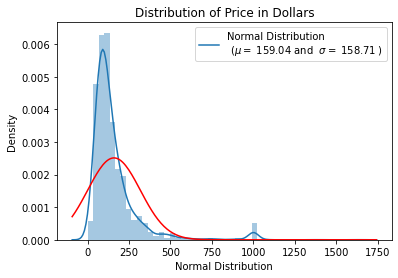

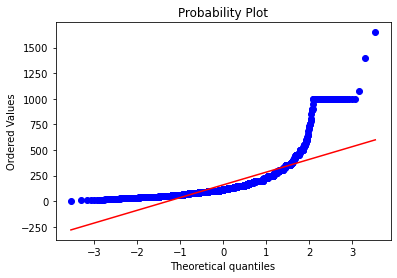

In [13]:

sns.distplot(data['price'][~data['price'].isnull()], axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})
plt.title('Distribution of Price in Dollars')
(mu, sigma) = st.norm.fit(train['price'])
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} and  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()

st.probplot(data['price'][~data['price'].isnull()], plot=plt)
plt.show()

##  Log-Transformation of the Target Variable

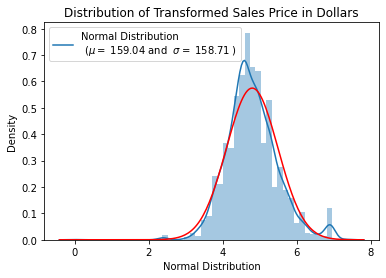

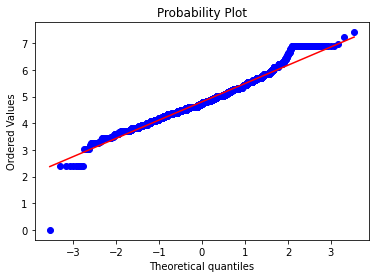

In [14]:
data['price'] = np.log1p(data['price'])

sns.distplot(data['price'][~data['price'].isnull()], axlabel="Normal Distribution", fit=st.norm, fit_kws={"color":"red"})

plt.title('Distribution of Transformed Sales Price in Dollars')
(mu, sigma) = st.norm.fit(train['price'])
plt.legend(['Normal Distribution \n ($\mu=$ {:.2f} and  $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best', fancybox=True)
plt.show()

st.probplot(data['price'][~data['price'].isnull()], plot=plt)
plt.show()

##### The above log transformation shows better than the previous skewed data.

# Numerical Variables and Categorical variables

## Check Missing Values

In [15]:
print('\n Missing values in train data')
print(data.isnull().sum())


 Missing values in train data
X1                                 0
accommodates                       0
amenities                          0
bathrooms                          0
bed_type                           0
bedrooms                           0
beds                               0
cancellation_policy                0
cleaning_fee                       0
guests_included                    0
host_identity_verified             0
host_is_superhost                  0
host_listings_count                0
host_response_rate                 0
host_response_time                 0
instant_bookable                   0
latitude                           0
longitude                          0
maximum_nights                     0
minimum_nights                     0
neighbourhood_group_cleansed       0
price                           1734
property_type                      0
room_type                          0
Dataset                            0
dtype: int64


###  Full analysis for Numerical Features

In [16]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  17


['X1',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'host_identity_verified',
 'host_is_superhost',
 'host_listings_count',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'price']

### Numerical variables are usually of 2 type
##### Continous variable and Discrete Variables

In [17]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [18]:
discrete_feature

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'guests_included',
 'host_identity_verified',
 'host_is_superhost',
 'instant_bookable']

###### Discrete Features vs Price Plot

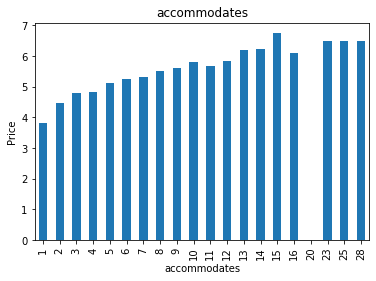

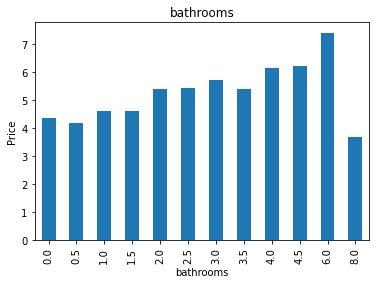

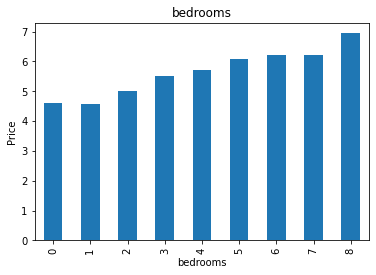

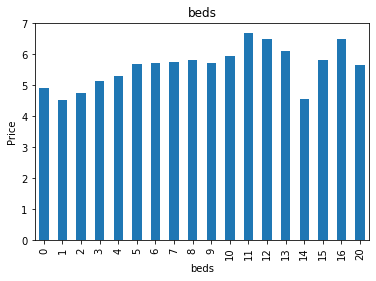

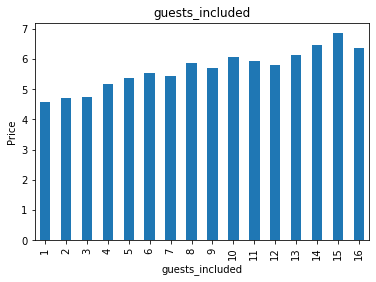

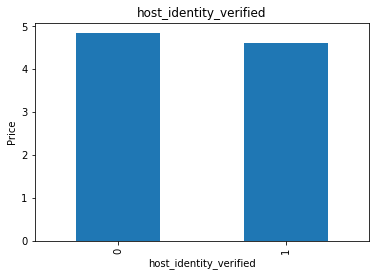

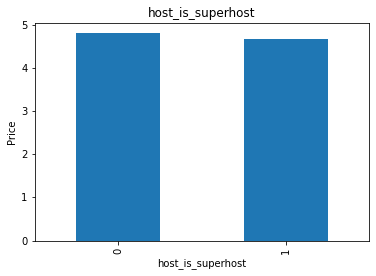

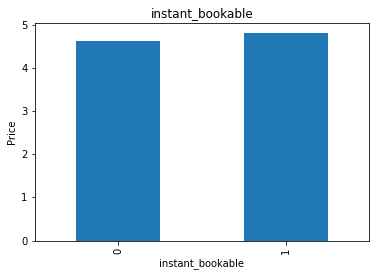

In [19]:
for feature in discrete_feature:
    data1=data.copy()
    data1.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

#### To check the Skewness

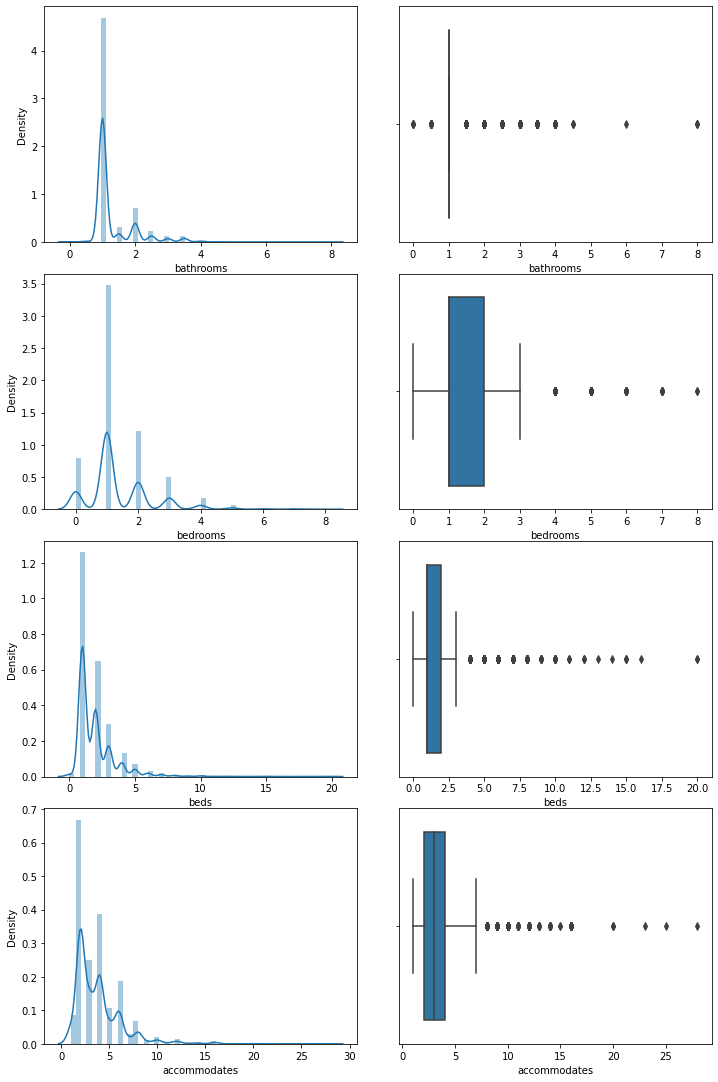

In [20]:
import warnings
warnings.filterwarnings('ignore')
cols = ['bathrooms', 'bedrooms', 'beds','accommodates']
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(10,15))
fig.tight_layout()
for i in range(len(cols)):
    sns.distplot(data[cols[i]], ax=axes[i,0])
    sns.boxplot(data[cols[i]], ax=axes[i,1])
fig.show()

In [21]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


In [22]:
continuous_feature

['X1',
 'cleaning_fee',
 'host_listings_count',
 'host_response_rate',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',
 'price']

##### Continous Features vs price histogram

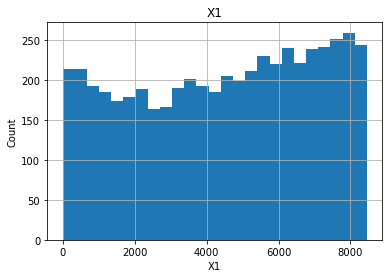

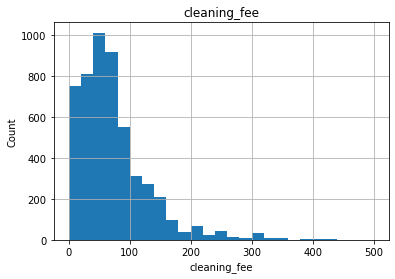

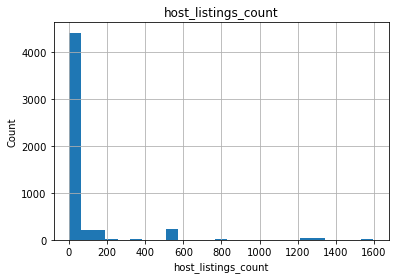

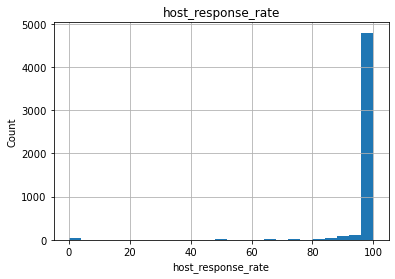

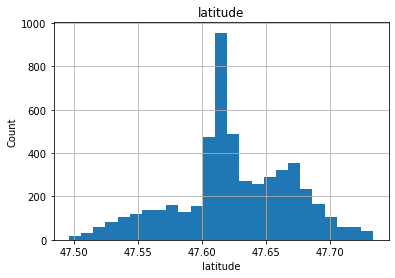

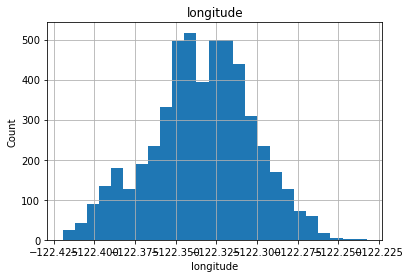

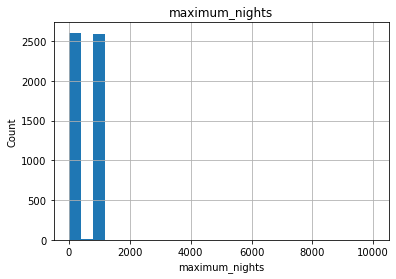

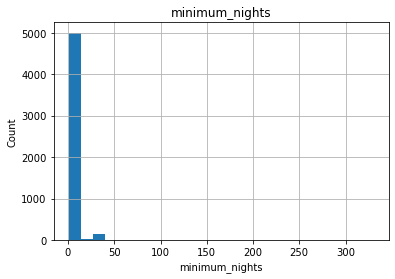

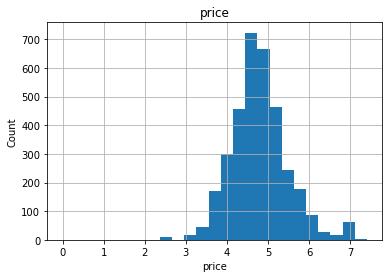

In [23]:
for feature in continuous_feature:
    data1=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Features

In [24]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical variables: ', len(categorical_features))
categorical_features

Number of categorical variables:  8


['amenities',
 'bed_type',
 'cancellation_policy',
 'host_response_time',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'Dataset']

In [25]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is amenities and number of categories are 4541
The feature is bed_type and number of categories are 5
The feature is cancellation_policy and number of categories are 6
The feature is host_response_time and number of categories are 4
The feature is neighbourhood_group_cleansed and number of categories are 17
The feature is property_type and number of categories are 27
The feature is room_type and number of categories are 3
The feature is Dataset and number of categories are 2


#### Countplot of Categorical Features

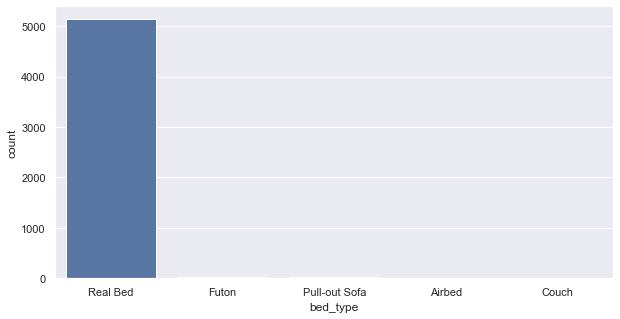

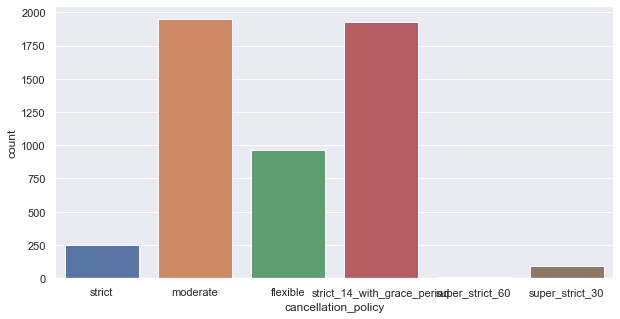

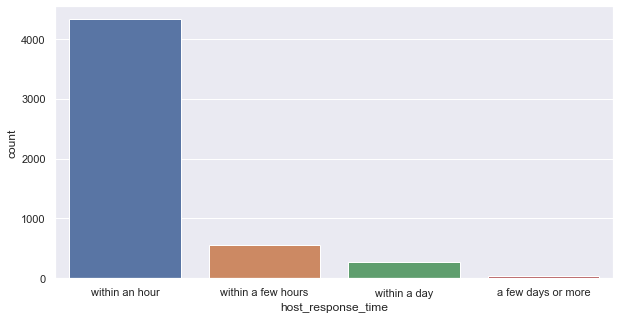

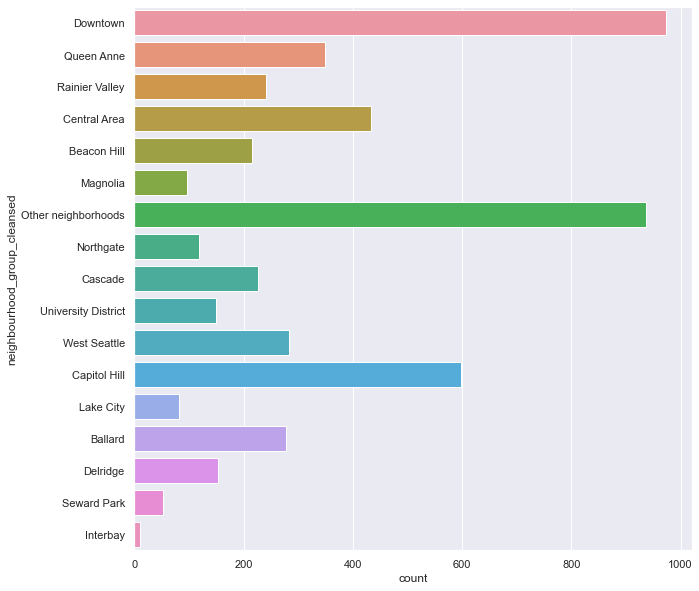

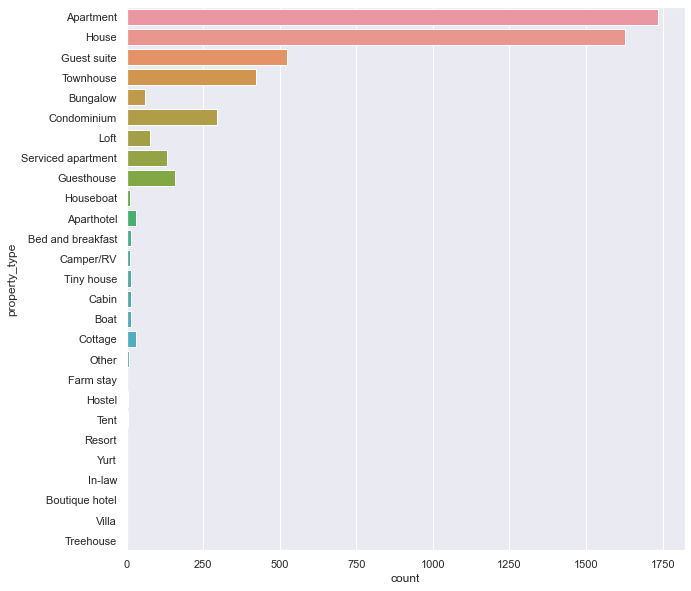

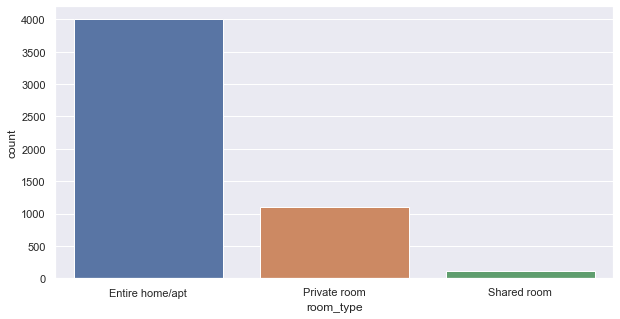

['bed_type', 'cancellation_policy', 'host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type']


In [26]:
sns.set(style="darkgrid")

columns_to_binarize = []

for c in ([
 'bed_type',
 'cancellation_policy',
 'host_response_time',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',]):
    columns_to_binarize.append(c)
    if len(set(data[c])) > 50:
        plt.figure(figsize=(10,50), dpi=150)
        ax = sns.countplot(y=c, data=data)
    elif 10 < len(set(data[c])) < 50:
        plt.figure(figsize=(10,10))
        ax = sns.countplot(y=c, data=data)
    else:
        plt.figure(figsize=(10,5))
        ax = sns.countplot(x=c, data=data)
    plt.show()

print(columns_to_binarize)

##### Categorical Features vs Price Plot

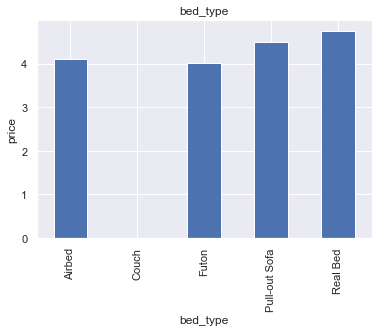

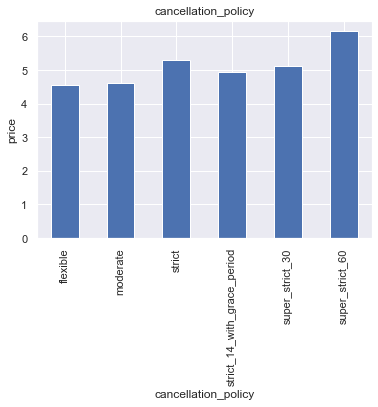

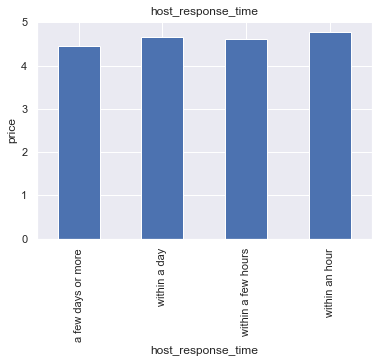

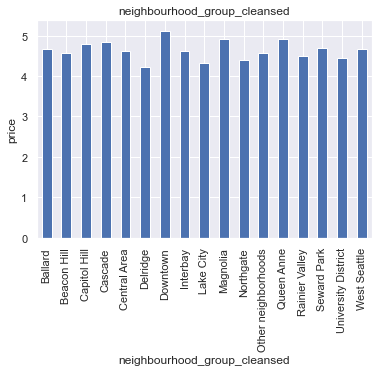

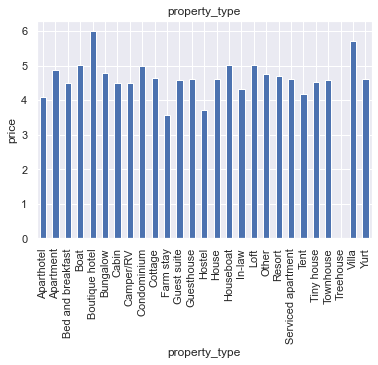

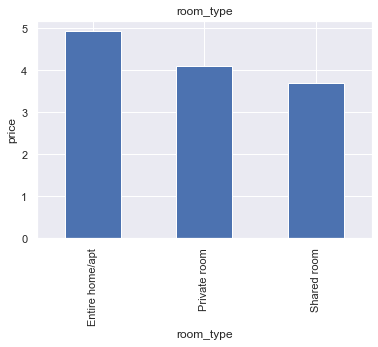

In [27]:
for feature in (['bed_type', 'cancellation_policy', 'host_response_time','neighbourhood_group_cleansed', 'property_type','room_type']):
    data1=data.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

### By looking into data I decided to drop these features which has less relation with the target variable.

In [28]:
data=data.drop(['host_response_rate','host_response_time','host_is_superhost','host_identity_verified','amenities'],axis=1)

In [29]:
data=data.drop(['X1'],axis=1)

#  Feature Engineering and Scaling

## Correlation Between Numeric Predictors


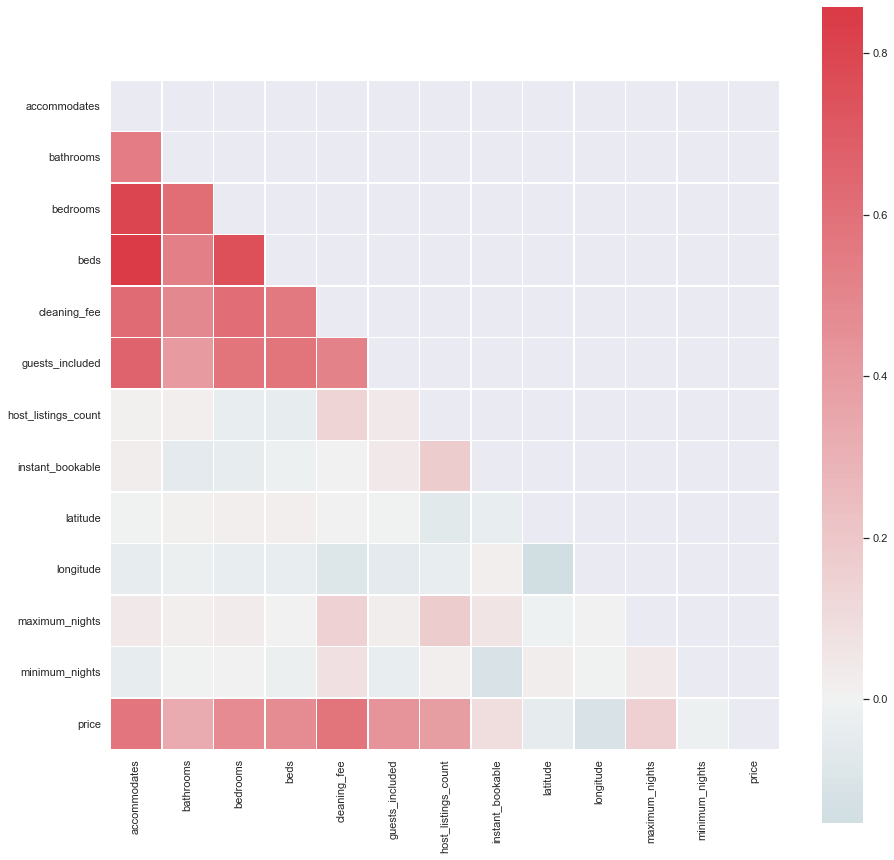

In [30]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.show()

In [31]:
data.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,guests_included,host_listings_count,instant_bookable,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_group_cleansed,price,property_type,room_type,Dataset
0,5,2.0,Real Bed,2,2,strict,129.0,4,521,1,47.612163,-122.338239,1125,2,Downtown,5.634790,Apartment,Entire home/apt,Train
1,2,1.0,Real Bed,0,1,moderate,50.0,1,1,1,47.640827,-122.355248,30,2,Queen Anne,4.605170,House,Entire home/apt,Train
2,4,1.0,Real Bed,1,2,moderate,25.0,2,1,0,47.549007,-122.273951,28,2,Rainier Valley,4.330733,Guest suite,Entire home/apt,Train
3,2,1.0,Real Bed,1,1,flexible,0.0,1,1,0,47.601922,-122.307979,30,2,Central Area,4.262680,House,Private room,Train
4,8,2.5,Real Bed,3,3,flexible,99.0,6,4,0,47.552311,-122.293409,12,2,Beacon Hill,5.493061,House,Entire home/apt,Train


## One Hot Encoding the Categorical Variables


In [32]:
data = pd.get_dummies(data)
print(data.shape)
data.head(3)

(5200, 73)


,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,instant_bookable,latitude,longitude,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Dataset_Test,Dataset_Train
0,5,2.0,2,2,129.0,4,521,1,47.612163,-122.338239,...,0,0,0,0,0,1,0,0,0,1
1,2,1.0,0,1,50.0,1,1,1,47.640827,-122.355248,...,0,0,0,0,0,1,0,0,0,1
2,4,1.0,1,2,25.0,2,1,0,47.549007,-122.273951,...,0,0,0,0,0,1,0,0,0,1


### Feature scaling and reduced Skewness using log transformation

In [33]:

numeric_feats = [
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'host_listings_count',
 'instant_bookable',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights',]
skewed_feats = data[numeric_feats].apply(lambda x: st.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew Before Transformation' :skewed_feats})

skewness = skewness[abs(skewness) > 1].dropna(axis=0)
skewed_features = skewness.index
for feat in skewed_features:
    data[feat] = np.log1p(data[feat]+1)

skewed_feats = data[skewed_features].apply(lambda x: st.skew(x.dropna())).sort_values(ascending=False)
skewness['Skew After Transformation'] = skewed_feats
skewness

,Skew Before Transformation,Skew After Transformation
minimum_nights,16.105002,3.411905
host_listings_count,4.701250,1.554145
beds,3.160646,1.315680
guests_included,2.797534,1.522745
bathrooms,2.663456,1.949062
accommodates,2.283216,0.789806
cleaning_fee,1.860861,-1.420295
bedrooms,1.572958,0.423587


In [34]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = [
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'guests_included',
 'host_listings_count',
 'instant_bookable',
 'latitude',
 'longitude',
 'maximum_nights',
 'minimum_nights']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [35]:
data.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,instant_bookable,latitude,longitude,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Dataset_Test,Dataset_Train
0,0.755895,1.266836,0.754566,0.201759,0.882527,1.359097,2.492334,0.862097,-0.279609,-0.134858,...,0,0,0,0,0,1,0,0,0,1
1,-0.846994,-0.496763,-1.738764,-0.761516,0.105423,-0.758431,-0.695642,0.862097,0.353721,-0.675888,...,0,0,0,0,0,1,0,0,0,1
2,0.314366,-0.496763,-0.280260,0.201759,-0.445816,0.120423,-0.695642,-1.159962,-1.675014,1.910069,...,0,0,0,0,0,1,0,0,0,1
3,-0.846994,-0.496763,-0.280260,-0.761516,-2.634845,-0.758431,-0.695642,-1.159962,-0.505868,0.827687,...,0,0,0,0,0,0,1,0,0,1
4,1.777507,1.988891,1.557239,0.948932,0.663786,2.237950,-0.267479,-1.159962,-1.602009,1.291142,...,0,0,0,0,0,1,0,0,0,1


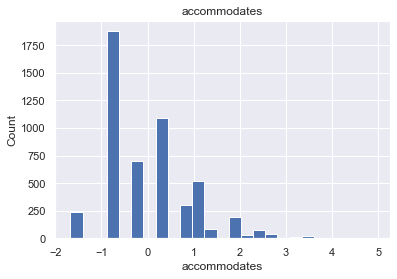

In [36]:
for feature in ['accommodates']:
    data2=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [37]:
## Outlier Detection

In [38]:
def outlier_detection(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3-Q1
    lower_cutoff = Q1 - (IQR * 1.5)
    upper_cutoff = Q3 + (IQR * 1.5)
    outliers = (data > Q3+1.5*IQR) | (data < Q1-1.5*IQR)
    return outliers

In [39]:
outlier_detection(data).head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,instant_bookable,latitude,longitude,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Dataset_Test,Dataset_Train
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Price Modelling


##  Obtaining Final Train and Test Sets

In [40]:
final_y_train = data['price'][~data['price'].isnull()]
final_X_train = data[data['Dataset_Train'] == 1].drop(['Dataset_Train', 'Dataset_Test', 'price'], axis=1)
final_X_test = data[data['Dataset_Test'] == 1].drop(['Dataset_Train', 'Dataset_Test', 'price'], axis=1)

In [41]:
final_X_train.shape

(3466, 70)

In [42]:
final_X_test.shape

(1734, 70)

### Feature Selection using Lasso regression model to select best features for model.  Least Absolute Shrinkage and Selection Operator helps us show to shrinkage of the features and prevents overfitting.

In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [44]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(final_X_train, final_y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [45]:
selected_feat = final_X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((final_X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 70
selected features: 22


In [46]:
final_X_train=final_X_train[selected_feat]

In [47]:
final_X_train.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,host_listings_count,latitude,longitude,maximum_nights,...,cancellation_policy_super_strict_30,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,property_type_Apartment,property_type_Guest suite,room_type_Entire home/apt,room_type_Shared room
0,0.755895,1.266836,0.754566,0.201759,0.882527,1.359097,2.492334,-0.279609,-0.134858,0.962757,...,0,0,0,1,0,0,1,0,1,0
1,-0.846994,-0.496763,-1.738764,-0.761516,0.105423,-0.758431,-0.695642,0.353721,-0.675888,-1.042347,...,0,0,0,0,0,1,0,0,1,0
2,0.314366,-0.496763,-0.280260,0.201759,-0.445816,0.120423,-0.695642,-1.675014,1.910069,-1.046009,...,0,0,0,0,0,0,0,1,1,0
3,-0.846994,-0.496763,-0.280260,-0.761516,-2.634845,-0.758431,-0.695642,-0.505868,0.827687,-1.042347,...,0,0,0,0,0,0,0,0,0,0
4,1.777507,1.988891,1.557239,0.948932,0.663786,2.237950,-0.267479,-1.602009,1.291142,-1.075307,...,0,0,0,0,0,0,0,0,1,0


In [48]:
final_X_test=final_X_test[selected_feat]

### Train-Test spllit : Normal train-test split using sklearn 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X_train, final_y_train, test_size = 0.2, random_state = 42)

#### Machine Learing (sklearn) Libraries.

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import median_absolute_error

## Normal Linear Model : The first model I decided to go with normal linear regression to see how it works 

In [51]:
reg = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=5)
print('R^2 score:', np.average(scores[scores > 0]))


R^2 score: 0.5956818898759422


#### It does not perform better 

## Random Forest ( Bagging Techinique ) : Its my favorite machine learning model easy and faster to train and can work with number of features and perfom better than decison tress. It avoids overfitting. It is an ensemble techinque which uses bootstrap aggregation and models run parellely.

In [52]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:

y_pred = reg_rf.predict(X_test)

In [54]:
reg_rf.score(X_train, y_train)

0.95793994984629

In [55]:
reg_rf.score(X_test, y_test)

0.7314751938322817

In [56]:

from sklearn import metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2488891247919194
MSE: 0.13139005649047372
RMSE: 0.36247766343662297


## Tune Random forest using RandomizedSearch : By doing hyparameter tuning we can improve the basic random forest algorithm to provide good results. Randomsized seearch can help to find best parameters for the problem statement.

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [63]:
prediction = rf_random.predict(X_test)

In [64]:
pred=rf_random.predict(final_X_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.2396743167990841
MSE: 0.11586038387206864
RMSE: 0.3403827020752797


In [66]:

metrics.r2_score(y_test, prediction)

0.7632135341686198

In [67]:
prediction1=np.exp(pred).round(2)

In [68]:
prediction1

array([129.51,  90.39,  98.1 , ...,  55.45, 114.38, 196.69])

In [69]:
finaldf = pd.DataFrame()
finaldf['id'] = test_id
finaldf['Price'] = prediction1

## XGBoost ( Boosting Technique) with hyperparameter tuning with GridSearchcv : I chose XGBoost for boosting ensemble Technique because its robust to outliers and have great performance . It helps to solve complex problems and in this models runs sequentially. Rather using the default XGBoost I have decided to tune it to find best parameters using GridCV Search.

In [70]:

xg_X_train, xg_X_test, xg_y_train, xg_y_test = train_test_split(final_X_train, final_y_train, test_size=0.2, random_state=42)

xg_model = XGBRegressor(n_estimators=100, seed = 1234)
param_dict = {'max_depth': [3,4,5],
              'min_child_weight': [2,3,4],
              'learning_rate': [0.05, 0.1,0.15],
              'gamma': [0.0, 0.1, 0.2]
}

start = time()
grid_search = GridSearchCV(xg_model, param_dict)
grid_search.fit(xg_X_train, xg_y_train)
print("GridSearch took %.2f seconds to complete." % (time()-start))
display(grid_search.best_params_)

GridSearch took 91.88 seconds to complete.


{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3}

In [71]:

xg_model = XGBRegressor(n_estimators = 1000,
                        learning_rate = 0.1,
                        max_depth = 5,
                        min_child_weight = 2,
                        gamma = 0.1,
                        seed = 1234)
start = time()
xg_model.fit(xg_X_train, xg_y_train)
xg_preds = xg_model.predict(xg_X_test)
print("Model took %.2f seconds to complete." % (time()-start))
print('MAE:', metrics.mean_absolute_error(xg_y_test, xg_preds))
print('MSE:', metrics.mean_squared_error(xg_y_test, xg_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(xg_y_test, xg_preds)))

Model took 2.79 seconds to complete.
MAE: 0.25810305205275613
MSE: 0.12413517391277362
RMSE: 0.3523282190128597


In [72]:
metrics.r2_score(xg_y_test, xg_preds)

0.7463021601186364

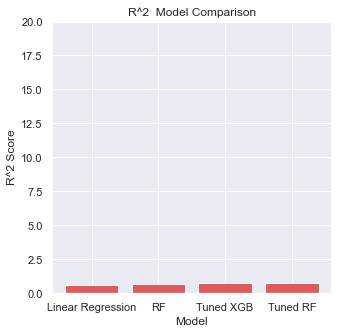

In [75]:
labels = np.array(['Linear Regression','RF','Tuned RF', 'Tuned XGB'])
error_val = np.array([0.59,0.72,0.77,0.74])
pos = np.arange(error_val.shape[0])
srt = np.argsort(error_val)
plt.figure(figsize=(5,5))
plt.bar(pos, error_val[srt], align = 'center', color='#E35A5C')
plt.xticks(pos, labels[srt])
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('R^2  Model Comparison')
plt.ylim(0,20)
plt.show()

## From all the models Tuned Random Forest gives the better results , so I predicted the test data on it to get the final results for this task. 

In [74]:
finaldf.to_csv('D:/finalDF.csv')

In [76]:
finaldf

,id,Price
0,392779,129.51
1,12456183,90.39
2,1851863,98.10
3,23309878,133.10
4,10768347,51.80
...,...,...
1729,19350610,95.35
1730,7886656,112.41
1731,3535171,55.45
1732,27930170,114.38
